LOAD DATA

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("leukemia_gene_expression.csv")

# Show first 5 rows
print(df.head())

# Check shape of data
print(df.shape)


     Gene_1    Gene_2    Gene_3    Gene_4    Gene_5    Gene_6    Gene_7  \
0  1.872701  4.753572  3.659970  2.993292  0.780093  0.779973  0.290418   
1  0.925665  2.709505  4.364729  3.661124  4.032806  3.293917  3.461383   
2  1.308528  1.234894  4.531273  1.247731  1.359749  3.796991  2.248699   
3  3.363515  3.983407  1.252339  3.124370  2.858730  4.164152  4.530435   
4  2.859979  4.027162  3.800805  0.769500  0.746247  1.340872  1.805374   

     Gene_8    Gene_9   Gene_10  ...  Gene_992  Gene_993  Gene_994  Gene_995  \
0  4.330881  3.005575  3.540363  ...  3.473482  1.360726  2.951153  1.804869   
1  4.245978  1.248340  2.447125  ...  0.794541  3.051126  0.676770  3.756875   
2  3.883553  0.326831  2.437856  ...  4.000017  2.763535  1.982768  0.658575   
3  0.060784  3.370100  0.259179  ...  1.055630  3.762342  0.256469  2.462677   
4  2.042278  3.398486  0.283402  ...  2.867816  1.708206  3.242323  0.342204   

   Gene_996  Gene_997  Gene_998  Gene_999  Gene_1000  Diagnosis  
0 

Exploratory Data Analysis

In [2]:
# Dataset info
print(df.info())

# Summary statistics
print(df.describe())

# Check class balance
print(df["Diagnosis"].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 1001 entries, Gene_1 to Diagnosis
dtypes: float64(1000), object(1)
memory usage: 7.6+ MB
None
            Gene_1       Gene_2       Gene_3       Gene_4       Gene_5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.461020     2.458892     2.496761     2.446560     2.491377   
std       1.451230     1.447928     1.440632     1.417235     1.428170   
min       0.002041     0.001651     0.003054     0.005673     0.002218   
25%       1.216545     1.221974     1.259216     1.182899     1.300070   
50%       2.522167     2.455106     2.484981     2.389980     2.462965   
75%       3.749097     3.675854     3.741525     3.643599     3.685092   
max       4.990858     4.993805     4.997879     4.994352     4.990726   

            Gene_6       Gene_7       Gene_8       Gene_9      Gene_10  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   

Missing values and duplicates

In [3]:
print(df.isnull().sum().sum())  # total missing values
print(df.duplicated().sum())    # duplicate rows


0
0


Distribution of the gene expression

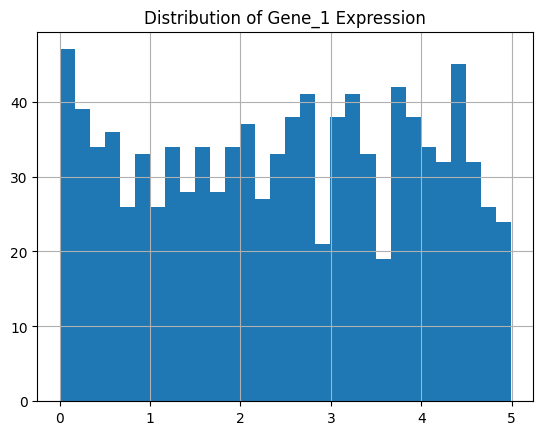

In [4]:
import matplotlib.pyplot as plt

df["Gene_1"].hist(bins=30)
plt.title("Distribution of Gene_1 Expression")
plt.show()


Compare expression across diagnosis

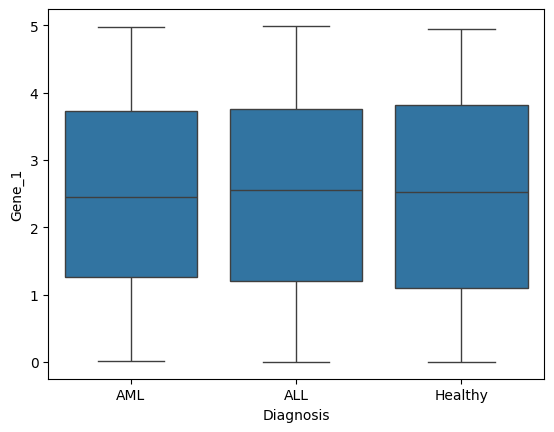

In [5]:
import seaborn as sns

sns.boxplot(x="Diagnosis", y="Gene_1", data=df)
plt.show()


Correlation Between Genes

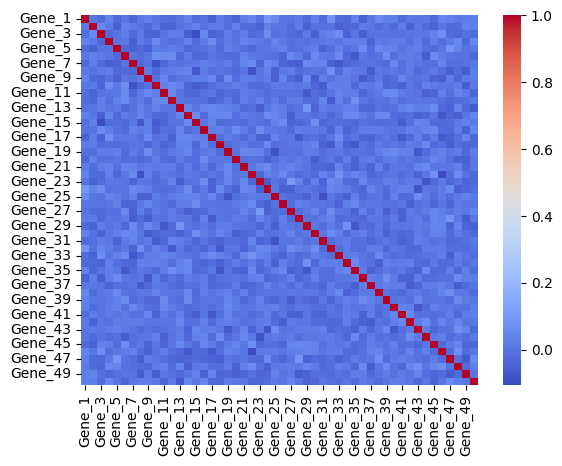

In [6]:
corr = df.drop("Diagnosis", axis=1).corr()
sns.heatmap(corr.iloc[:50, :50], cmap="coolwarm")  # first 50 genes for readability
plt.show()


Dimensionality Reduction

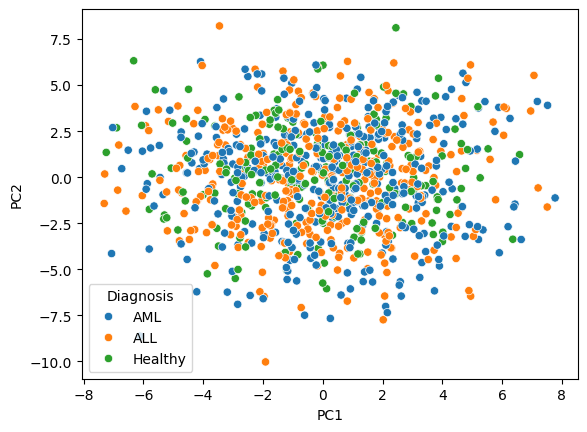

In [7]:
from sklearn.decomposition import PCA
import seaborn as sns

X = df.drop("Diagnosis", axis=1)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

df["PC1"] = pca_result[:,0]
df["PC2"] = pca_result[:,1]

sns.scatterplot(x="PC1", y="PC2", hue="Diagnosis", data=df)
plt.show()


Feauture Variability

In [8]:
variances = df.drop("Diagnosis", axis=1).var().sort_values(ascending=False)
top_genes = variances.head(20)
print(top_genes)


PC1         7.922566
PC2         7.787726
Gene_221    2.261985
Gene_166    2.250805
Gene_837    2.247405
Gene_555    2.246946
Gene_200    2.246386
Gene_595    2.245780
Gene_772    2.240272
Gene_29     2.227532
Gene_440    2.226748
Gene_639    2.225202
Gene_82     2.224283
Gene_151    2.223428
Gene_978    2.220198
Gene_876    2.218769
Gene_946    2.218092
Gene_439    2.217854
Gene_579    2.215395
Gene_149    2.215336
dtype: float64
